# Support Vector Machines

## Imports

In [48]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from nltk.stem import PorterStemmer
import re

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
data = loadmat('ex6/ex6data1.mat'); 
X = data['X']
y = data['y']

In [ ]:
X1 = X[:, 0][:, None]
X2 = X[:, 1][:, None]

In [ ]:
positive_idx = y == 1
negative_idx = y == 0

In [ ]:
positive_data = pd.DataFrame()

In [ ]:
ax = sns.scatterplot(x = X1[positive_idx], y = X2[positive_idx], marker = '+', color = 'blue')
ax = sns.scatterplot(x = X1[negative_idx], y = X2[negative_idx], marker = 'o', color = 'red')

## Linear Classification

In [ ]:
classifier = SVC(kernel="linear")
classifier.fit(X, np.ravel(y))

### C = 1

Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to 1/lambda where lambda is the regularization parameter

In [ ]:
x1 = np.linspace(0, 5, 100)
x2 = np.linspace(1.5, 5, 100)

In [ ]:
xx, yy = np.meshgrid(x1, x2)

In [ ]:
z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

In [ ]:
ax = sns.scatterplot(x = X1[positive_idx], y = X2[positive_idx], marker = '+', color = 'blue')
ax = sns.scatterplot(x = X1[negative_idx], y = X2[negative_idx], marker = 'o', color = 'red')
plt.contour(xx, yy, z)

### C = 100

In [ ]:
classifier = SVC(kernel="linear", C = 100.0)
classifier.fit(X, np.ravel(y))

In [ ]:
z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

In [ ]:
ax = sns.scatterplot(x = X1[positive_idx], y = X2[positive_idx], marker = '+', color = 'blue')
ax = sns.scatterplot(x = X1[negative_idx], y = X2[negative_idx], marker = 'o', color = 'red')
plt.contour(xx, yy, z)

## Non Linear Decision Boundary

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. 

You can think of the Gaussian kernel as a sim- ilarity function that measures the “distance” between a pair of examples

### Gaussian Kernel

In [3]:
data = loadmat('ex6/ex6data2.mat')
X = data['X']
X1 = data['X'][:, 0:1]
X2 = data['X'][:, 1:2]
y = data['y']

In [4]:
positive_idx = y == 1
negative_idx = y == 0

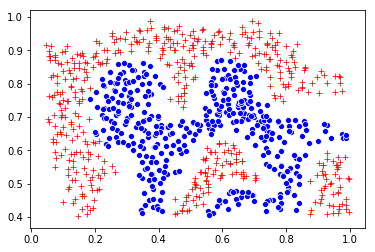

In [5]:
sns.scatterplot(X1[positive_idx], X2[positive_idx], 
                marker = '+', color = 'red')
sns.scatterplot(X1[negative_idx], X2[negative_idx], 
                marker = 'o', color = 'blue')

#### From Scratch

In [6]:
def gaussianKernel(x1, x2, sigma = 0.1):
    x1 = x1.flatten()
    x2 = x2.flatten()
    diff = (x2 - x1)**2
    sum_diff = np.sum(diff, axis = 0)
    denom = float(2 * sigma**2)
    result = -(sum_diff / denom)
    return np.exp(result)

#### Validation

In [ ]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

In [ ]:
sim = gaussianKernel(x1, x2, 2);
sim

In [120]:
def gaussianKernelGramMatrix(X1 = X1, X2 = X2, k_function = gaussianKernel, sigma = 0.1):
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            gram_matrix[i, j] = k_function(x1, x2, sigma)
    return gram_matrix
        

In [ ]:
gram_matrix = gaussianKernelGramMatrix(x1, x2, gaussianKernel, 0.1)

#### Sklearn Classifier

In [8]:
svm = SVC(kernel = gaussianKernelGramMatrix);
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=<function gaussianKernelGramMatrix at 0x1a215d92f0>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [9]:
svm.fit(X, np.ravel(y))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=<function gaussianKernelGramMatrix at 0x1a215d92f0>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

### Plotting

In [12]:
x1 = np.linspace(X1.min()-0.5, X2.max()+0.5, 100)
x2 = np.linspace(X2.min()-0.5, X2.max()+0.5, 100)

xx, yy = np.meshgrid(x1, x2)

z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

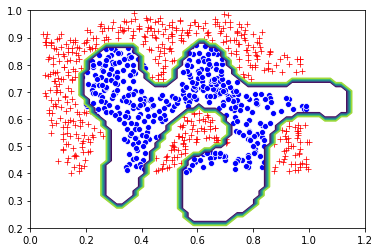

In [17]:
plt.contour(xx, yy, z)
sns.scatterplot(X1[positive_idx], X2[positive_idx], 
                marker = '+', color = 'red')
sns.scatterplot(X1[negative_idx], X2[negative_idx], 
                marker = 'o', color = 'blue')
plt.xlim([0, 1.2]);
plt.ylim([0.2, 1]);

## Finding Best Parameters

In [102]:
data = loadmat('ex6/ex6data3.mat')
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']

In [104]:
X1 = X[:, 0:1]
X2 = X[:, 1:2]
X1val = Xval[:, 0:1]
X2val = Xval[:, 1:2]

In [40]:
positive_idx = y == 1
negative_idx = y == 0

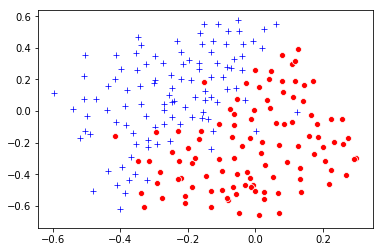

In [41]:
ax = sns.scatterplot(x = X1[positive_idx], y = X2[positive_idx], marker = '+', color = 'blue')
ax = sns.scatterplot(x = X1[negative_idx], y = X2[negative_idx], marker = 'o', color = 'red')

In [30]:
def predictions(X1, X2):
    x1 = np.linspace(X1.min()-0.5, X2.max()+0.5, 100)
    x2 = np.linspace(X2.min()-0.5, X2.max()+0.5, 100)

    xx, yy = np.meshgrid(x1, x2)

    z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    return xx, yy, z

In [87]:
def plot_graphs(X1, X2, xx, yy, z):
    plt.contour(xx, yy, z)
    plt.xlim([X1.min() - 0.5, X1.max() + 0.5]);
    plt.ylim([X2.min() - 0.5, X2.max() + 0.5]);

In [89]:
def plot_data(X, y):
    X1 = X[:, 0:1]
    X2 = X[:, 1:2]
    
    positive_idx = y == 1
    negative_idx = y == 0
    
    sns.scatterplot(X1[positive_idx], X2[positive_idx], 
                marker = '+', color = 'red')
    sns.scatterplot(X1[negative_idx], X2[negative_idx], 
            marker = 'o', color = 'blue')

In [129]:
svm = SVC(C = 0.1, kernel = gaussianKernelGramMatrix)
svm.fit(X, np.ravel(y))

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=<function gaussianKernelGramMatrix at 0x1a24580b70>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [130]:
xx, yy, z = predictions(X1val, X2val)

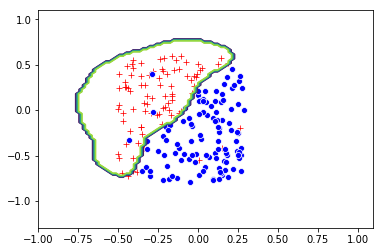

In [131]:
plot_data(Xval, yval)
plt.contour(xx, yy, z)

# Spam Classifier

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter.

In [7]:
spam_train = loadmat('ex6/spamTrain.mat')
spam_test = loadmat('ex6/spamTest.mat')

In [141]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

In [152]:
svm = SVC(kernel = 'linear')

In [153]:
svm.fit(X, y)
print('Test accuracy = {0}%'.format(np.round(svm.score(Xtest, ytest) * 100, 2)))

Test accuracy = 97.8%


In [39]:
def load_vocab_list():
    data = pd.read_csv('ex6/vocab.txt', sep = '\t', header = None).iloc[:, 1:2]
    return data

In [54]:
def preProcessEmail(email_contents):
    """
    Preprocesses the body of an email and returns a list of indices of the words contained in the email. 
    """
    # Lower case
    email_contents = email_contents.lower()
    
    # Handle numbers
    email_contents = re.sub("[0-9]+","number",email_contents)
    
    # Handle URLS
    email_contents = re.sub("[http|https]://[^\s]*","httpaddr",email_contents)
    
    # Handle Email Addresses
    email_contents = re.sub("[^\s]+@[^\s]+","emailaddr",email_contents)
    
    # Handle $ sign
    email_contents = re.sub("[$]+","dollar",email_contents)
    
    # Strip all special characters
    specialChar = ["<","[","^",">","+","?","!","'",".",",",":"]
    for char in specialChar:
        email_contents = email_contents.replace(str(char),"")
    email_contents = email_contents.replace("\n"," ")    
    
    # Stem the word
    ps = PorterStemmer()
    email_contents = [ps.stem(token) for token in email_contents.split(" ")]
    email_contents= " ".join(email_contents)
    
    # Process the email and return word_indices
    return email_contents

In [82]:
findWordIndex(preProcessed_email, vocabList)

In [79]:
vocabList = load_vocab_list()

In [44]:
file_contents = open("ex6/emailSample1.txt","r").read()

In [66]:
preProcessed_email = preProcessEmail(file_contents)

In [125]:
def findWordIndex(email, vocabList):
    vocabList = np.array(vocabList)
    word_indices = []
    words = email.split()
    for word in words:
        if word in vocabList:
            index = np.where(vocabList == word)
            word_indices.append(index[0][0])
    return word_indices
        

In [126]:
indices = findWordIndex(preProcessed_email, vocabList)

In [135]:
def email_features(email_indices, vocabList):
    feature_set = np.zeros((1, vocabList.shape[0]))
    feature_set[:, email_indices] = 1
    return feature_set

In [136]:
f = email_features(indices, vocabList)

In [139]:
def find_top_predictors_for_spam(model):
    pass

In [160]:
type(svm.coef_)

numpy.ndarray

In [217]:
sorted_indices = np.argsort(svm.coef_)[0, ::-1][20:]

In [227]:
weights = svm.coef_[0, sorted_indices]

In [230]:
words = vocabList.iloc[sorted_indices]

In [238]:
top_predictors = np.hstack((words, weights[:, None]))

In [246]:
print(f'Top Words of Spam:')
for row in top_predictors[:10]:
    print(f'{row[0]}: {round(row[1], 3)}')

Top Words of Spam:
our: 0.718
flash: 0.585
wi: 0.554
numberb: 0.55
remov: 0.527
visit: 0.495
click: 0.485
bodi: 0.471
guarante: 0.462
send: 0.461
